<a href="https://colab.research.google.com/github/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation/blob/main/Detection_of_Healthy_Unhealthy_Leaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [1]:
import cv2
import numpy as np # dataAnalysis
import pandas as pd #multidimensional arrays
import matplotlib.pyplot as plt #data visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import img_as_ubyte
from skimage.util import img_as_float

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation.git

fatal: destination path 'Prediction-Recommedation-system-for-Potato-Cultivation' already exists and is not an empty directory.


In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


In [5]:
import os
path = os.listdir('/content/drive/MyDrive//Dataset/Training')
classes = {'Healthy':0, 'Unhealthy':1}

**Image preprocessing and segmentation**

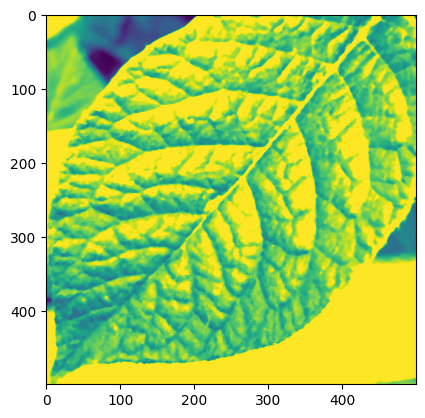

In [7]:
x=[]
y=[]
output_dir = '/content/drive/MyDrive/Dataset/Preprocessed/'
for cls in classes:
    pth = '/content/drive/MyDrive/Dataset/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j)
        img1 = cv2.resize(img, (500,500))#image resizing
        img1 = cv2.medianBlur(img1, 5)#apply median filter for remove noise
        img1 = img_as_ubyte(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)) #contrast improve
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) # Convert the image to grayscale
        ret,img1 = cv2.threshold(img1,127,255,cv2.THRESH_TRUNC) #Threshould technique      

        # Save preprocessed image
        output_path = os.path.join(output_dir, cls, j)
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        cv2.imwrite(output_path, img1)

               
        x.append(img1)
        y.append(img)

plt.imshow(x[0]) #image after preprocessing

**Feature extraction**

In [12]:
from skimage.feature import greycomatrix, greycoprops
import numpy as np

preprocessed_dir = '/content/drive/MyDrive/Dataset/Preprocessed/'
glcm_features = []
labels = []

for cls in classes:
    pth = os.path.join(preprocessed_dir, cls)
    for j in os.listdir(pth):
        img_path = os.path.join(pth, j)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Compute GLCM
        glcm = greycomatrix(img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
        
        # Compute GLCM properties
        contrast = greycoprops(glcm, prop='contrast')[0, 0]
        dissimilarity = greycoprops(glcm, prop='dissimilarity')[0, 0]
        homogeneity = greycoprops(glcm, prop='homogeneity')[0, 0]
        energy = greycoprops(glcm, prop='energy')[0, 0]
        correlation = greycoprops(glcm, prop='correlation')[0, 0]

        glcm_features.append([contrast, dissimilarity, homogeneity, energy, correlation])
        labels.append(cls)  # Assign label based on the class


# Print GLCM features and labels for each image
for i, features in enumerate(glcm_features):
    print(f"Image {i+1}: Contrast={features[0]}, Dissimilarity={features[1]}, Homogeneity={features[2]}, Energy={features[3]}, Correlation={features[4]}, Label={labels[i]}")


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0

Image 1: Contrast=13.65615631262525, Dissimilarity=2.115202404809619, Homogeneity=0.4886316390699152, Energy=0.20358608617673532, Correlation=0.9802451359689883, Label=Healthy
Image 2: Contrast=10.685390781563125, Dissimilarity=1.7066653306613224, Homogeneity=0.5721555292148633, Energy=0.30529507529546995, Correlation=0.9904610674282958, Label=Healthy
Image 3: Contrast=4.336160320641283, Dissimilarity=0.9197034068136272, Homogeneity=0.7470471939855012, Energy=0.4927442805312723, Correlation=0.997260174251016, Label=Healthy
Image 4: Contrast=16.581134268537074, Dissimilarity=1.6610781563126251, Homogeneity=0.6775743353806282, Energy=0.526813255367878, Correlation=0.9877219972330138, Label=Healthy
Image 5: Contrast=8.5351623246493, Dissimilarity=1.1628416833667334, Homogeneity=0.725213794626262, Energy=0.5417081478720938, Correlation=0.9890111022531245, Label=Healthy
Image 6: Contrast=6.262653306613227, Dissimilarity=1.3301482965931863, Homogeneity=0.630788141333325, Energy=0.34274254572

In [13]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
X = np.array(glcm_features)  # Features matrix
y = np.array(labels)  # Target vector (labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = svm.SVC()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6132075471698113
